<a href="https://colab.research.google.com/github/Dakshina98/Tourism_rating/blob/main/Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df1=pd.read_csv("/content/tourism_rating.csv")
df2= pd.read_excel("/content/tourism_with_id.xlsx")
df3= pd.read_csv("/content/user.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
df1.shape

(10000, 3)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
print(df1.head())
print(df2.head())
print(df3.head())

   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  Monumen Nasional atau yang populer disingkat d...         Budaya  Jakarta   
1  Kota tua di Jakarta, yang juga bernama Kota Tu...         Budaya  Jakarta   
2  Dunia Fantasi atau disebut juga Dufan adalah t...  Taman Hiburan  Jakarta   
3  Taman Mini Indonesia Indah merupakan suatu kaw...  Taman Hiburan  Jakarta   
4  Atlantis Water Adventure atau dikenal dengan A...  Taman Hiburan  Jakarta   

  

In [ ]:
print(df1.isnull().sum() ,"\n")
print(df2.isnull().sum(),"\n")
print(df3.isnull().sum())

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64 

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64 

User_Id     0
Location    0
Age         0
dtype: int64


In [ ]:
df2.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [ ]:
df2=df2.drop([ "Unnamed: 11",  "Unnamed: 12"] , axis=1)
df2

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753


In [ ]:
df1.duplicated().sum()


79

In [ ]:
df2.duplicated().sum()


0

In [ ]:
df3.duplicated().sum()


0

In [ ]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [ ]:
# Explore the user group that provides the tourism ratings by analyzing the age distribution of users visiting the places and rating them
age_distribution_with_rating = df1.merge(df3,on='User_Id')
age_distribution_with_rating

,User_Id,Place_Id,Place_Ratings,Location,Age
0,1,179,3,"Semarang, Jawa Tengah",20
1,1,344,2,"Semarang, Jawa Tengah",20
2,1,5,5,"Semarang, Jawa Tengah",20
3,1,373,3,"Semarang, Jawa Tengah",20
4,1,101,4,"Semarang, Jawa Tengah",20
...,...,...,...,...,...
9916,300,425,2,"Ponorogo, Jawa Timur",26
9917,300,64,4,"Ponorogo, Jawa Timur",26
9918,300,311,3,"Ponorogo, Jawa Timur",26
9919,300,279,4,"Ponorogo, Jawa Timur",26


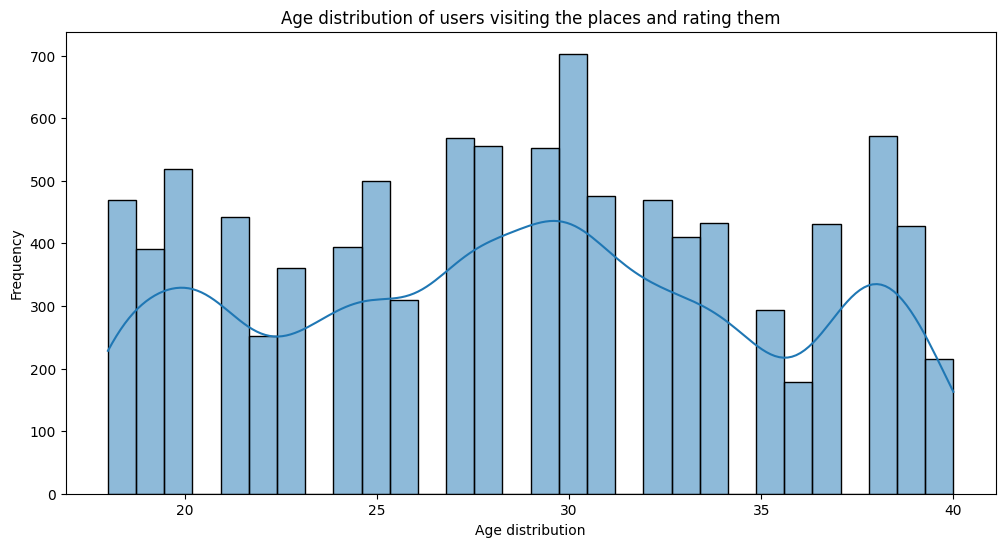

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(age_distribution_with_rating['Age'], bins=30, kde=True)
plt.title('Age distribution of users visiting the places and rating them')
plt.xlabel('Age distribution')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Explore the user group that provides the tourism ratings by identifying the places where most of these users (tourists) are coming from
user_place=df3['Location'].value_counts().reset_index()
user_place.columns = ['Location','Number of users']
user_place

,Location,Number of users
0,"Bekasi, Jawa Barat",39
1,"Semarang, Jawa Tengah",22
2,"Yogyakarta, DIY",20
3,"Lampung, Sumatera Selatan",20
4,"Bogor, Jawa Barat",17
5,"Jakarta Selatan, DKI Jakarta",14
6,"Subang, Jawa Barat",14
7,"Cirebon, Jawa Barat",14
8,"Depok, Jawa Barat",12
9,"Ponorogo, Jawa Timur",11


In [ ]:
# What are the different categories of tourist spots?
diff_categories=df2['Category'].value_counts().reset_index().sort_index()
diff_categories

,Category,count
0,Taman Hiburan,135
1,Budaya,117
2,Cagar Alam,106
3,Bahari,47
4,Tempat Ibadah,17
5,Pusat Perbelanjaan,15


In [ ]:
# What kind of tourism each location is most famous or suitable for?
each_loc_famous_for=df2.groupby(['City','Category'])['Place_Id'].count().reset_index(name='Count')
each_loc_famous_for

,City,Category,Count
0,Bandung,Budaya,22
1,Bandung,Cagar Alam,54
2,Bandung,Pusat Perbelanjaan,1
3,Bandung,Taman Hiburan,39
4,Bandung,Tempat Ibadah,8
5,Jakarta,Bahari,8
6,Jakarta,Budaya,32
7,Jakarta,Cagar Alam,4
8,Jakarta,Pusat Perbelanjaan,10
9,Jakarta,Taman Hiburan,27


In [ ]:
y=each_loc_famous_for.loc[each_loc_famous_for.groupby('City')['Count'].idxmax()]
y

,City,Category,Count
1,Bandung,Cagar Alam,54
6,Jakarta,Budaya,32
13,Semarang,Cagar Alam,20
17,Surabaya,Budaya,18
26,Yogyakarta,Taman Hiburan,36


In [ ]:
# Which city would be best for a nature enthusiast to visit?
z=each_loc_famous_for[(each_loc_famous_for['Category']== 'Cagar Alam')]
x = df2[df2['Category'].isin(['Cagar Alam'])]
y = x['City'].value_counts()
w = y.idxmax()
w

'Bandung'

In [ ]:
z=each_loc_famous_for.loc[(each_loc_famous_for['Category']== 'Cagar Alam').idxmax()]
z['City']

'Bandung'

In [ ]:
q=df2.merge(df1, on="Place_Id")
q

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,User_Id,Place_Ratings
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,38,2
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,64,2
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,74,2
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,86,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,284,5
9917,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,288,1
9918,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,288,4
9919,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816,297,4


In [ ]:
q.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'User_Id',
       'Place_Ratings'],
      dtype='object')

In [ ]:
#figure out the spots that are most loved by the tourists
a=q.groupby(['Place_Id','Place_Name','City','Category'])['Place_Ratings'].mean().reset_index()
b=a.sort_values(by='Place_Ratings', ascending=False)
b.head(10)


,Place_Id,Place_Name,City,Category,Place_Ratings
415,416,Keraton Surabaya,Surabaya,Budaya,3.933333
138,139,Puncak Gunung Api Purba - Nglanggeran,Yogyakarta,Cagar Alam,3.882353
51,52,Kampung Cina,Jakarta,Budaya,3.842105
321,322,Bukit Jamur,Bandung,Cagar Alam,3.793103
253,254,Teras Cikapundung BBWS,Bandung,Taman Hiburan,3.789474
111,112,Bukit Bintang Yogyakarta,Yogyakarta,Taman Hiburan,3.764706
96,97,Monumen Yogya Kembali,Yogyakarta,Budaya,3.761905
320,321,Glamping Lakeside Rancabali,Bandung,Taman Hiburan,3.750000
0,1,Monumen Nasional,Jakarta,Budaya,3.722222
156,157,Pantai Baron,Yogyakarta,Bahari,3.695652


In [ ]:
# which city has the most loved tourist spots?
c=b.groupby('City')['Place_Ratings'].mean().sort_values(ascending=False).reset_index()
c.head(1)

,City,Place_Ratings
0,Yogyakarta,3.104765


In [ ]:
# Indonesia provides a wide range of tourist spots ranging from historical and cultural beauties to advanced amusement parks. Among these, which category of places are users liking the most?
d=b.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False).reset_index()
d.head(1)

,Category,Place_Ratings
0,Taman Hiburan,3.119702


In [ ]:
pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357288 sha256=f4929f9c0e78288e0ac2fdef2f2d24be17527c23b126e3b09e28fde2e9fdedeb
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Reader,accuracy,SVD,Dataset
from surprise.model_selection import train_test_split, cross_validate

In [ ]:
q.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,User_Id,Place_Ratings
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,38,2
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,64,2
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,74,2
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,86,4


In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(q[['User_Id','Place_Id','Place_Ratings']],reader)

In [ ]:
trainset,testset = train_test_split(data,test_size = 0.2)

In [ ]:
svd = SVD(n_factors=100, n_epochs=100, reg_all=0.1)
svd.fit(trainset)

In [ ]:
crosval = cross_validate(svd,data,measures = ['RMSE','MAE'],cv = 5,verbose =True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4492  1.4908  1.4866  1.4527  1.4498  1.4658  0.0187  
MAE (testset)     1.2338  1.2860  1.2680  1.2421  1.2414  1.2543  0.0196  
Fit time          0.60    0.57    0.68    0.65    0.54    0.61    0.05    
Test time         0.01    0.01    0.01    0.01    0.03    0.01    0.01    


In [ ]:
# Predict ratings for the test set
predictions = svd.test(testset)

In [ ]:
# Calculate RMSE
rmse = accuracy.rmse(predictions)

RMSE: 0.7322


In [ ]:
# Function to recommend places based on a given place
def recommend_place(user_id,place_id,n_recommendations = 5):
  place_ids = q['Place_Id'].unique()
  user_ratings = [(place, svd.predict(user_id,place).est) for place in place_ids if q[(q['User_Id'] == user_id)& (q['Place_Id']==place)].empty]
  # Sort the places by predicted rating
  user_ratings.sort(key=lambda x: x[1], reverse=True)

  top_recommendations = user_ratings[:n_recommendations]

  recommended_places = [(df2[df2['Place_Id'] == place]['Place_Name'].values[0], rating) for place, rating in top_recommendations]

  return recommended_places

In [ ]:
example_recommendations = recommend_place(user_id=1, place_id=1, n_recommendations=5)
print(example_recommendations)

[('Alun-alun Utara Keraton Yogyakarta', 4.489588272532172), ('Keraton Surabaya', 4.46926099402159), ('Monumen Yogya Kembali', 4.445108415920716), ('Wisata Lereng Kelir', 4.377614096485934), ('Glamping Lakeside Rancabali', 4.303079778083289)]
